<a href="https://colab.research.google.com/github/monisarathy/demos/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

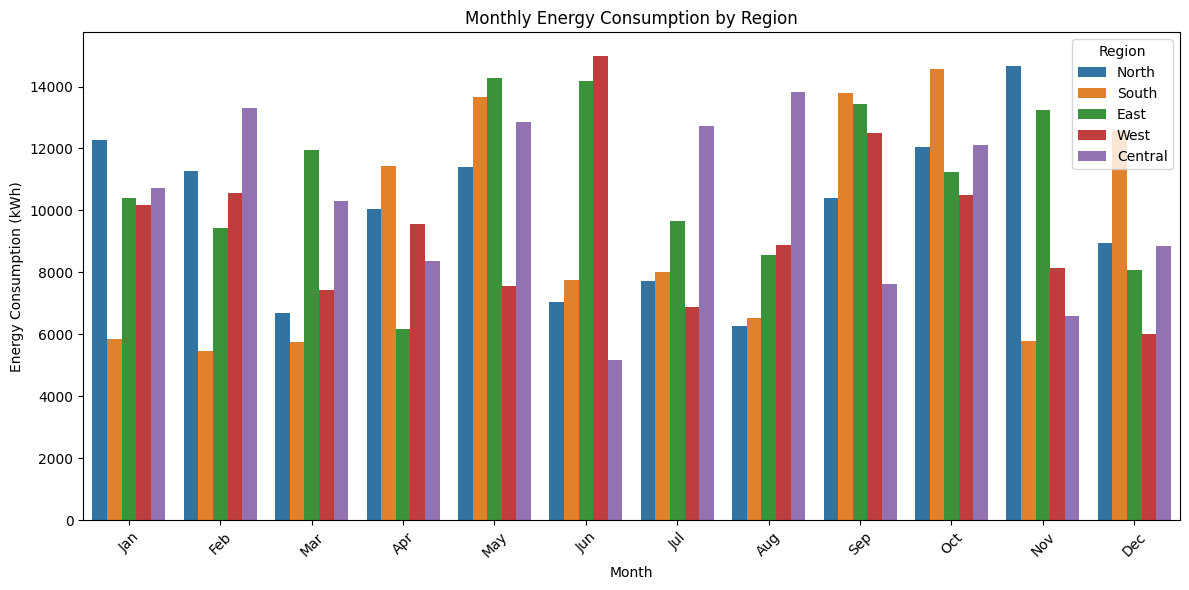

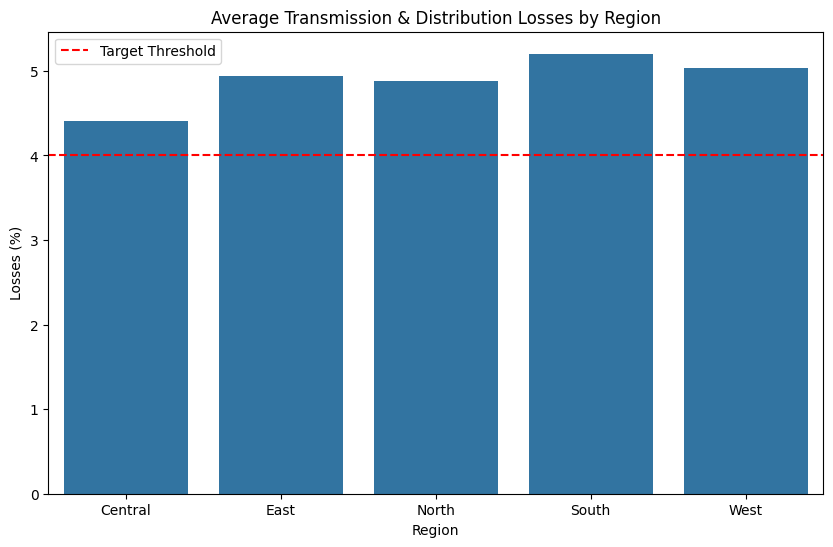

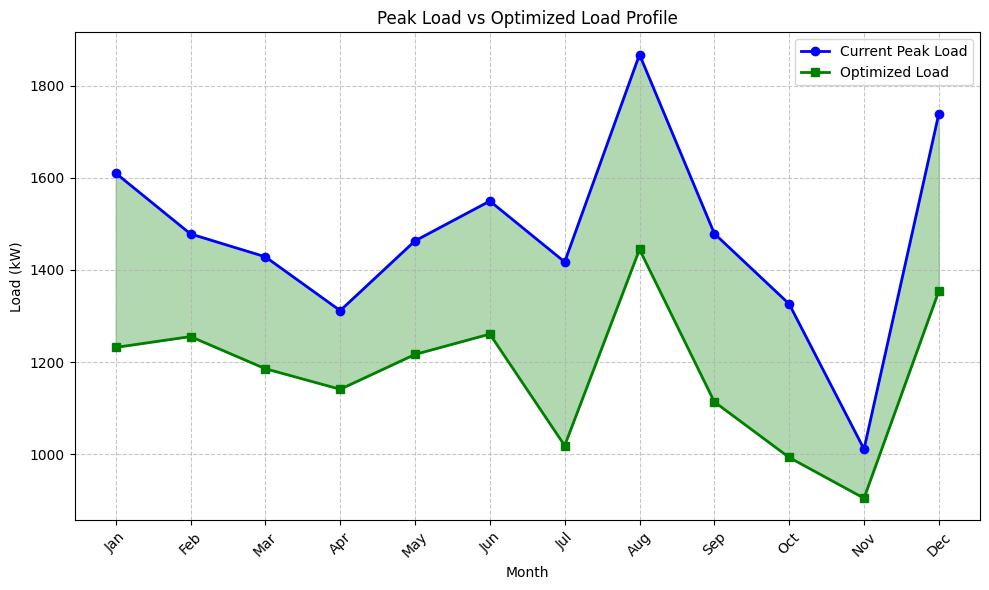

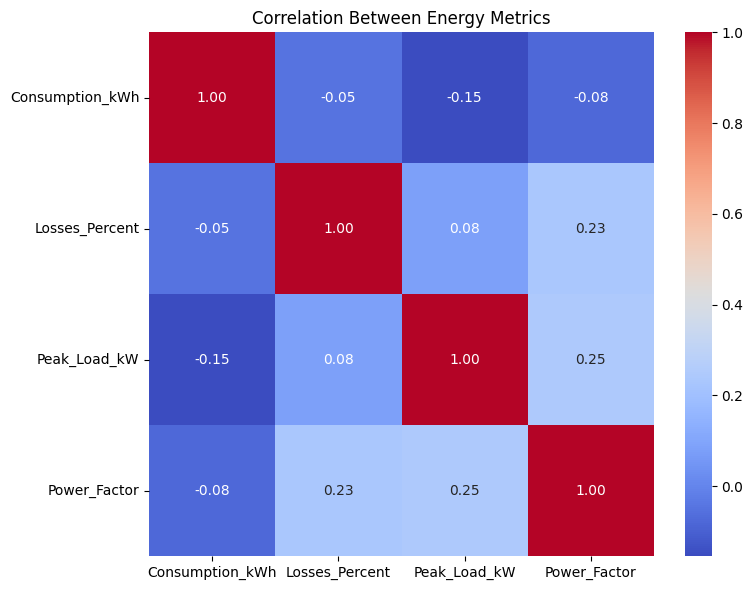

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
regions = ['North', 'South', 'East', 'West', 'Central']

energy_data = pd.DataFrame({
    'Month': np.repeat(months, len(regions)),
    'Region': regions * len(months),
    'Consumption_kWh': np.random.randint(5000, 15000, len(months) * len(regions)),
    'Losses_Percent': np.random.uniform(2.0, 8.0, len(months) * len(regions)),
    'Peak_Load_kW': np.random.randint(500, 2000, len(months) * len(regions)),
    'Power_Factor': np.random.uniform(0.8, 0.98, len(months) * len(regions))
})

energy_data['Cost_Savings'] = energy_data['Consumption_kWh'] * energy_data['Losses_Percent'] * 0.01 * 0.15

plt.figure(figsize=(12, 6))
sns.barplot(data=energy_data, x='Month', y='Consumption_kWh', hue='Region')
plt.title('Monthly Energy Consumption by Region')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
regional_losses = energy_data.groupby('Region')['Losses_Percent'].mean().reset_index()
sns.barplot(data=regional_losses, x='Region', y='Losses_Percent')
plt.axhline(y=4.0, color='r', linestyle='--', label='Target Threshold')
plt.title('Average Transmission & Distribution Losses by Region')
plt.ylabel('Losses (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
peak_load = energy_data.groupby('Month')['Peak_Load_kW'].mean()
months_numeric = range(len(months))
plt.plot(months_numeric, peak_load, marker='o', linewidth=2, color='blue')
optimized_load = peak_load * np.random.uniform(0.7, 0.9, len(peak_load))
plt.plot(months_numeric, optimized_load, marker='s', linewidth=2, color='green')
plt.fill_between(months_numeric, peak_load, optimized_load, alpha=0.3, color='green')
plt.title('Peak Load vs Optimized Load Profile')
plt.ylabel('Load (kW)')
plt.xlabel('Month')
plt.xticks(months_numeric, months, rotation=45)
plt.legend(['Current Peak Load', 'Optimized Load'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

correlation = energy_data[['Consumption_kWh', 'Losses_Percent', 'Peak_Load_kW', 'Power_Factor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Energy Metrics')
plt.tight_layout()
plt.show()